In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# 5. Image Binary Classification

Objective: re-implement the binary image classification model discussed in class using the original training and test datasets

In [15]:
def load_dataset():
  with h5py.File("train_catvnoncat.h5", "r") as train_file:
    X_train = np.array(train_file["train_set_x"][:])
    y_train = np.array(train_file["train_set_y"][:])
    classes = np.array(train_file["list_classes"][:])

  with h5py.File("test_catvnoncat.h5", "r") as test_file:
    X_test = np.array(test_file["test_set_x"][:])
    y_test = np.array(test_file["test_set_y"][:])

  return X_train, y_train, X_test, y_test, classes

In [16]:
X_train, y_train, X_test, y_test, classes = load_dataset()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Classes:", classes)

X_train shape: (209, 64, 64, 3)
y_train shape: (209,)
X_test shape: (50, 64, 64, 3)
y_test shape: (50,)
Classes: [b'non-cat' b'cat']


## Task 1: Re-implement the Classification Model

In [17]:
# Flatten and normalize images
m_train = X_train.shape[0]
m_test = X_test.shape[0]

X_train_flat = X_train.reshape(m_train, -1) / 255.0
X_test_flat = X_test.reshape(m_test, -1) / 255.0

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)

Flattened train shape: (209, 12288)
Flattened test shape: (50, 12288)


In [18]:
# Model Definition

# Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


# Add bias term
def add_bias(X):
  return np.c_[np.ones((X.shape[0], 1)), X]


# Cross-entropy loss
def cross_entropy_loss(y, y_hat):
  eps = 1e-15
  y_hat = np.clip(y_hat, eps, 1 - eps)
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


In [19]:
# Training
def train_logreg_gd(X, y, learning_rate=0.01, num_epochs=2000):
    """
    Train logistic regression using gradient descent.
    Returns theta and the loss history.
    """
    X_b = add_bias(X)                       # (m, d+1)
    theta = np.zeros(X_b.shape[1])          # initialize parameters
    losses = []

    for _ in range(num_epochs):
        # Forward pass
        y_hat = sigmoid(X_b @ theta)

        # Loss
        loss = cross_entropy_loss(y, y_hat)
        losses.append(loss)

        # Gradient
        grad = (X_b.T @ (y_hat - y)) / X_b.shape[0]

        # Update
        theta -= learning_rate * grad

    return theta, losses

Next we use the flattened training data and labels to train. The function returns the learned parameters (theta) and the loss history.

In [20]:
# Hyperparameters
learning_rate = 0.01
num_epochs = 2000     # number iterations

# Use flattened training data and labels
theta, losses = train_logreg_gd(X_train_flat, y_train,
                                learning_rate=learning_rate,
                                num_epochs=num_epochs)

print("Final loss:", losses[-1])

Final loss: 0.06988871089855195


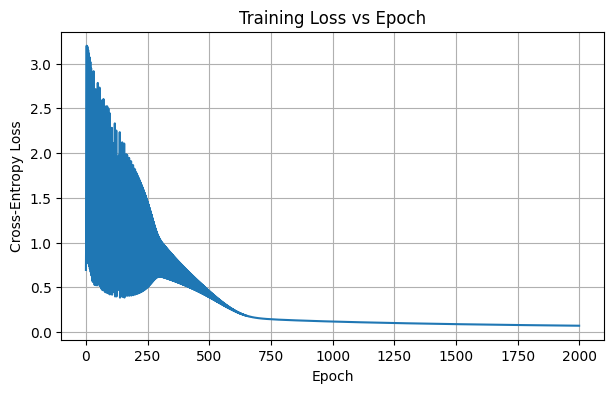

In [21]:
# Plotting to show convergence
plt.figure(figsize=(7, 4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss vs Epoch")
plt.grid(True)
plt.show()

## Task 2: Misclassification analysis

Report indices of misclassified test images.

An image is **misclassified** when the model's predicted label dosn't match the true label from the dataset.

In [22]:
# Predict on the test set
def predict(X, theta):
    probs = sigmoid(add_bias(X) @ theta)
    return (probs >= 0.5).astype(int)

test_preds = predict(X_test_flat, theta)

*"If this combination of pixel intensities is present, predict cat.*

Ex: *Green leaves $\to$* not cat

In [23]:
# Report indices
mis_idx = np.where(test_preds != y_test)[0] # begin with 0

print("Misclassified test indices:")
print(mis_idx)
print("Number misclassified:", len(mis_idx))

Misclassified test indices:
[ 5  6 10 11 13 18 19 28 29 30 34 41 44 45 46]
Number misclassified: 15


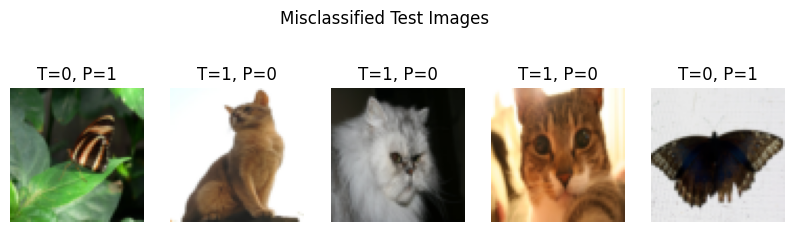

In [49]:
# Display some misclassified images
plt.figure(figsize=(10, 3))

for i, idx in enumerate(mis_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"T={y_test[idx]}, P={test_preds[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Test Images")
plt.show()

$T=$ True label \
$P=$ Predicted label

- **$T=0$, $P=1$:** Non-cat image incorrectly classified as a cat

- **$T=1$, $P=0$:** Cat image incorrectly classified as a non-cat

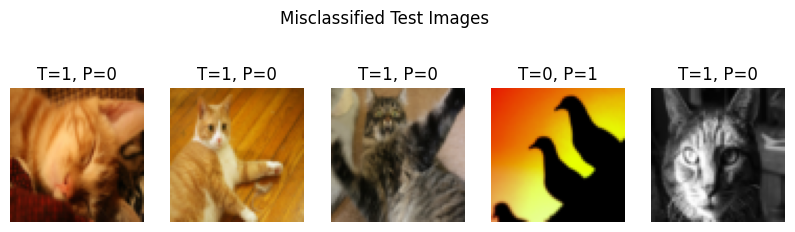

In [48]:
# Display some misclassified images
plt.figure(figsize=(10, 3))

for i, idx in enumerate(mis_idx[5:10]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"T={y_test[idx]}, P={test_preds[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Test Images")
plt.show()

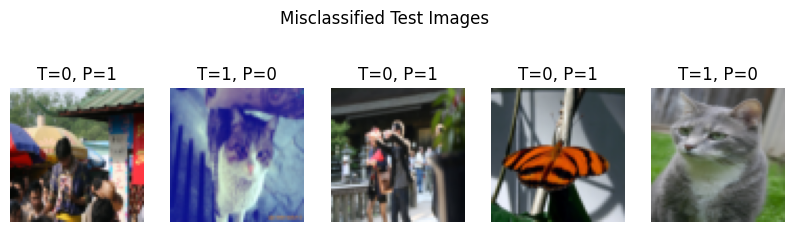

In [47]:
# Display some misclassified images
plt.figure(figsize=(10, 3))

for i, idx in enumerate(mis_idx[10:15]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"T={y_test[idx]}, P={test_preds[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Test Images")
plt.show()